In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
y_test.shape

(10000,)

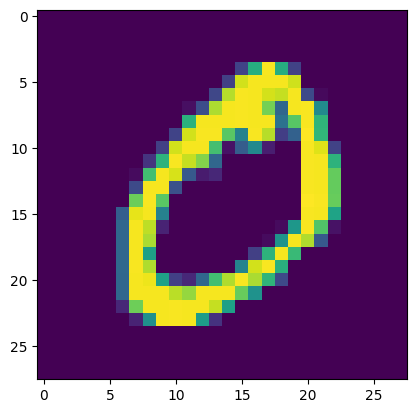

In [24]:
plt.imshow(X_train[1])

In [25]:
X_train = X_train/255
X_test = X_test/255

In [52]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2674 - accuracy: 0.9223 - val_loss: 0.1320 - val_accuracy: 0.9595
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1117 - accuracy: 0.9667 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0770 - accuracy: 0.9761 - val_loss: 0.1260 - val_accuracy: 0.9628
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0929 - val_accuracy: 0.9735
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.0957 - val_accuracy: 0.9746
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0980 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0956 - val_accuracy

In [56]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [57]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [60]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9768
[[ 974    1    0    1    0    0    2    0    1    1]
 [   0 1132    0    1    0    1    0    0    1    0]
 [   2    7 1004    6    0    1    4    2    5    1]
 [   0    2    3  989    0    5    0    3    5    3]
 [   1    0    0    1  967    0    5    0    1    7]
 [   2    0    0   11    1  866    6    1    3    2]
 [  11    3    0    1    3    4  936    0    0    0]
 [   2   12    8   11    2    1    0  983    3    6]
 [   3    1    1   11    6    5    3    1  938    5]
 [   2    3    0    5   14    2    0    3    1  979]]


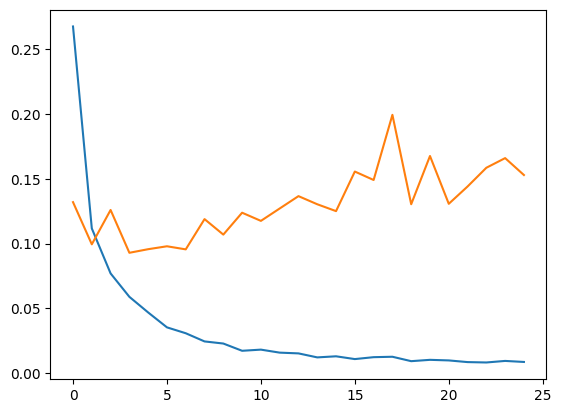

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

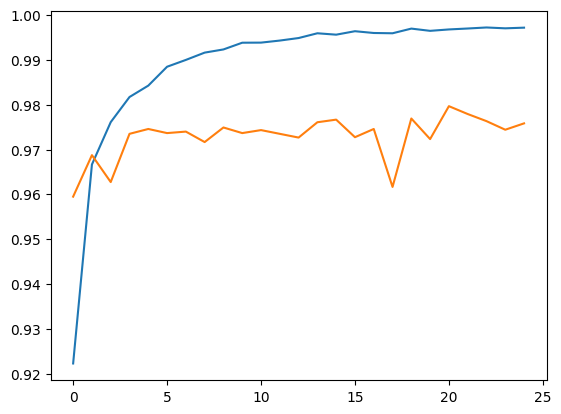

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])